# Les méthodes d'ensemble

## Contexte du projet
Les méthodes d'ensemble font aujourd'hui partie, avec l'apprentissage profond, des techniques parmi les plus performantes et efficaces pour effectuer du Machine Learning. Le but de ce brief est d'acquérir les notions de bases associées à ces méthodes. Pour cela, construire tout d'abord une présentation de type Powerpoint selon le plan suivant :

- Quel est le principe général des méthodes d'ensemble ?
- Que sont le "Bagging" et le "Pasting" ?
- Qu'est ce que l'évaluation "Out-Of-Bag" ?
- Qu'est ce que la méthode de "Random Patches" ?
- Qu'est ce que la méthode de "Random Subspaces" ?
- Décrire plus particulièrement ce qu'est une RandomForest et lesquels des concepts présentés précédemment sont utilisés par ce modèle.
- Expliciter enfin l'ensemble des paramètres de la fonction "RandomForestRegressor" de la librairie Scikit-Learn.
​

**Mise en pratique** : entrainer au travers de trois Notebooks (cf section "Livrables attendus") une RandomForest sur le jeu de données "California Housing Dataset".

​

**Question subsidiaire** : comparer les performances obtenues sur le jeu de test par la RandomForest à celles obtenues par un modèle de type régression linéaire multiple.

# Importation des librairies

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import os
from matplotlib.pyplot import figure
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Importation des données

In [2]:
from sklearn.datasets import fetch_california_housing

In [3]:
df= fetch_california_housing(as_frame=True)

In [4]:
df.data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [5]:
df.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [6]:
df.target.describe()

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: MedHouseVal, dtype: float64

# Data cleaning

In [7]:
df.data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [8]:
df.data.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

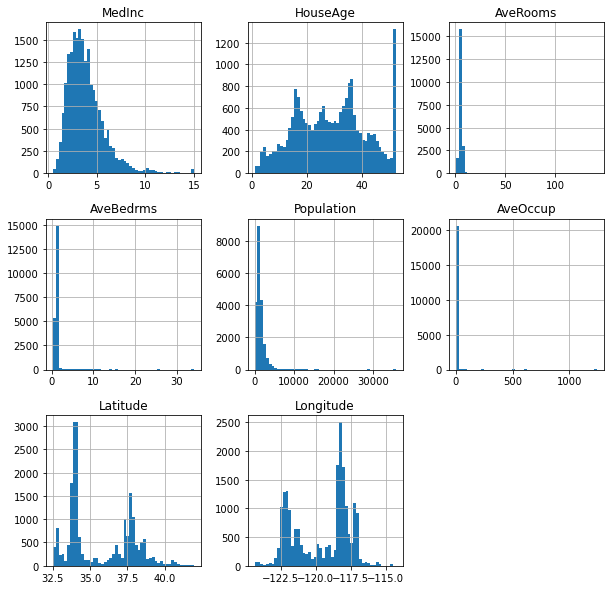

In [9]:
df.data.hist(bins=50, figsize=(10, 10)) #visualizing an histogram
plt.show()

In [10]:
X = df.data
y = df.target

In [11]:
X.shape

(20640, 8)

In [12]:
y.shape

(20640,)

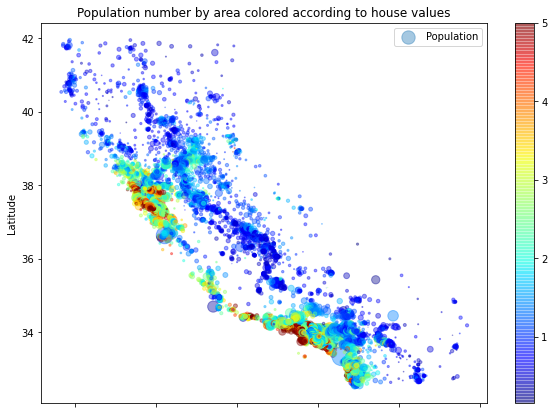

In [30]:
df.data.plot(kind='scatter', x='Longitude', y='Latitude', alpha=0.4, 
    s=df.data['Population']/100, #size of the circle based on population/100
        label='Population', figsize=(10,7), 
    c=df.target, #color of the circle that represent the median value of the houses
        cmap=plt.get_cmap('jet'), colorbar=True)

plt.xticks()
plt.yticks()
plt.title('Population number by area colored according to house values')
plt.show()

In [23]:
df_house = df.copy()

# Scaling

In [1]:
#actually not needed for this data
#scaler = StandardScaler()
#df_house[df_house.columns] = scaler.fit_transform(df_house[df_house.columns])

# Confusion Matrix

Text(0.5, 1.0, 'Matrice de corrélation de California Housing')

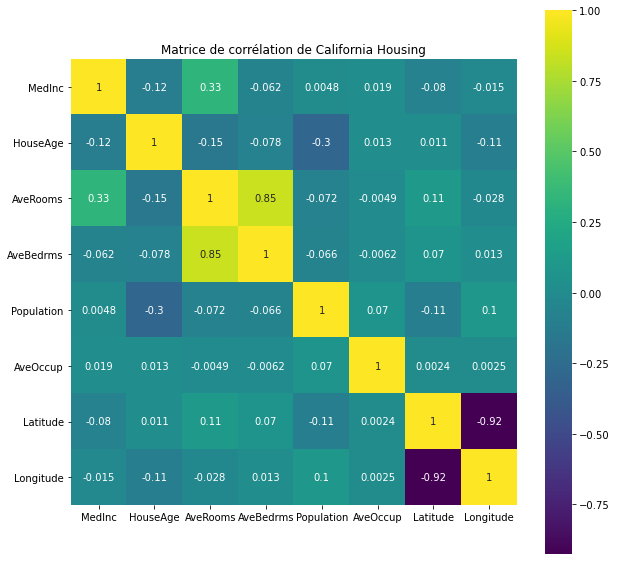

In [22]:
plt.figure(figsize=(10,10)) 
matrice_corr = df.data.corr() 
sns.heatmap(matrice_corr, vmax=1, square=True,annot=True,cmap='viridis')
plt.title('Matrice de corrélation de California Housing')

# Train test split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [24]:
print(X_train.shape)
print(y_train.shape)

(16512, 8)
(16512,)


In [25]:
X_train 

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14196,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,32.71,-117.03
8267,3.8125,49.0,4.473545,1.041005,1314.0,1.738095,33.77,-118.16
17445,4.1563,4.0,5.645833,0.985119,915.0,2.723214,34.66,-120.48
14265,1.9425,36.0,4.002817,1.033803,1418.0,3.994366,32.69,-117.11
2271,3.5542,43.0,6.268421,1.134211,874.0,2.300000,36.78,-119.80
...,...,...,...,...,...,...,...,...
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96
11964,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02,-117.43
5390,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96


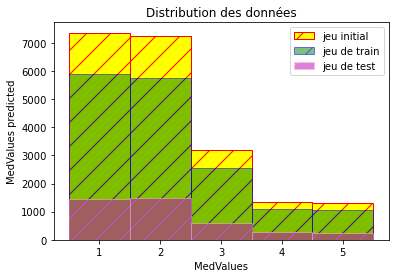

In [26]:
x1 = y
x2 = y_train
x3 = y_test
bins = [x + 0.5 for x in range(0, 6)]
plt.hist(x1, bins = bins, color = 'yellow',
            edgecolor = 'red', hatch = '/', label = 'jeu initial')
plt.hist(x2, bins = bins, color = 'green', alpha = 0.5,
            edgecolor = 'blue', hatch = '/', label = 'jeu de train')
plt.hist(x3, bins = bins, color = 'm', alpha = 0.5,
            edgecolor = 'pink', hatch = '/', label = 'jeu de test')
            
plt.ylabel('MedValues predicted')
plt.xlabel('MedValues')
plt.title('Distribution des données')
plt.legend()

# Registering Train and Test sets

In [28]:
# index_label=False : avoids adding an extra index
# do not tranform X and y to array in order to save it into csv
X_train.to_csv('X_train.csv',index_label=False)
X_test.to_csv('X_test.csv',index_label=False)
y_train.to_csv('y_train.csv',index_label=False)
y_test.to_csv('y_test.csv',index_label=False)